In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%config InlineBackend.figure_format='retina'

plt.style.use("bmh")

np.random.seed(0)

In [2]:
arr1 = xr.DataArray(
    np.arange(12).reshape(3, 4),
    dims=("space", "time"),
    coords={"space": ["a", "b", "c"], "time": [0, 1, 2, 3]},
)
arr1

<xarray.DataArray (space: 3, time: 4)> Size: 96B
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'
  * time     (time) int64 32B 0 1 2 3

In [5]:
arr2 = xr.DataArray([0, 1], dims="space", coords={"space": ["b", "d"]})
arr2

(2,)

In [7]:
from rich import print

print(arr1.shape, arr2.shape)

(3, 4)
(2,)

In [4]:
arr1 - arr2

<xarray.DataArray (space: 1, time: 4)> Size: 32B
array([[4, 5, 6, 7]])
Coordinates:
  * space    (space) <U1 4B 'b'
  * time     (time) int64 32B 0 1 2 3

not all the dimensions can be subjected to broadcasting; they must meet certain rules. The image below illustrates how an operation on arrays with different coordinates will result in automatic broadcasting

![alt text](image.png)

Credit: Stephan Hoyer – [xarray ECMWF Python workshop](https://docs.google.com/presentation/d/16CMY3g_OYr6fQplUZIDqVtG-SKZqsG8Ckwoj2oOqepU/)

In [8]:
# Xarray does broadcasting by dimension name, rather than array shape. 
# This is a huge convenience.

# Here are two 1D arrays
array1 = xr.DataArray(
    np.arange(3),
    dims="space",
    coords={"space": ["a", "b", "c"]},
    name="array1"
)

array2 = xr.DataArray(
    np.arange(4),
    dims="time",
    coords={"time": [0, 1, 2, 3]},
    name="array2"
)

display(array1)
display(array2)

<xarray.DataArray 'array1' (space: 3)> Size: 24B
array([0, 1, 2])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'

<xarray.DataArray 'array2' (time: 4)> Size: 32B
array([0, 1, 2, 3])
Coordinates:
  * time     (time) int64 32B 0 1 2 3

In [9]:
array1 - array2

<xarray.DataArray (space: 3, time: 4)> Size: 96B
array([[ 0, -1, -2, -3],
       [ 1,  0, -1, -2],
       [ 2,  1,  0, -1]])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'
  * time     (time) int64 32B 0 1 2 3

In [17]:
array1_broadcasted, array2_broadcasted = xr.broadcast(array1, array2)

display(array1.dims)
display(array1_broadcasted.dims)
display(array2.dims)
display(array2_broadcasted.dims)

('space',)

('space', 'time')

('time',)

('space', 'time')

In [21]:
display(array1)
display(array2)
display(array1 + array2)

<xarray.DataArray 'array1' (space: 3)> Size: 24B
array([0, 1, 2])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'

<xarray.DataArray 'array2' (time: 4)> Size: 32B
array([0, 1, 2, 3])
Coordinates:
  * time     (time) int64 32B 0 1 2 3

<xarray.DataArray (space: 3, time: 4)> Size: 96B
array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'
  * time     (time) int64 32B 0 1 2 3

In [22]:
display(array1 + array2)
display(array2 + array1)

<xarray.DataArray (space: 3, time: 4)> Size: 96B
array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'
  * time     (time) int64 32B 0 1 2 3

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])
Coordinates:
  * time     (time) int64 32B 0 1 2 3
  * space    (space) <U1 12B 'a' 'b' 'c'

In [24]:
array1.data, array2.data

(array([0, 1, 2]), array([0, 1, 2, 3]))

In [28]:
array1.data + array2.data

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [27]:
# To get this calculation to work, we need to insert new axes manually 
# using np.newaxis.

array1.data[:, np.newaxis] + array2.data[np.newaxis, :]

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])

In [30]:
array = xr.DataArray(
    np.arange(12).reshape(3, 4),
    dims=("space", "time"),
    coords={"space": ["a", "b", "c"], "time": [0, 1, 2, 3]},
    name="array",
)
array.shape, display(array)

<xarray.DataArray 'array' (space: 3, time: 4)> Size: 96B
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'
  * time     (time) int64 32B 0 1 2 3

((3, 4), None)

In [32]:
array.mean("time")[: np.newaxis]

<xarray.DataArray 'array' (space: 3)> Size: 24B
array([1.5, 5.5, 9.5])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'

In [34]:
array - array.mean("time")

<xarray.DataArray 'array' (space: 3, time: 4)> Size: 96B
array([[-1.5, -0.5,  0.5,  1.5],
       [-1.5, -0.5,  0.5,  1.5],
       [-1.5, -0.5,  0.5,  1.5]])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'
  * time     (time) int64 32B 0 1 2 3

#### Alignment

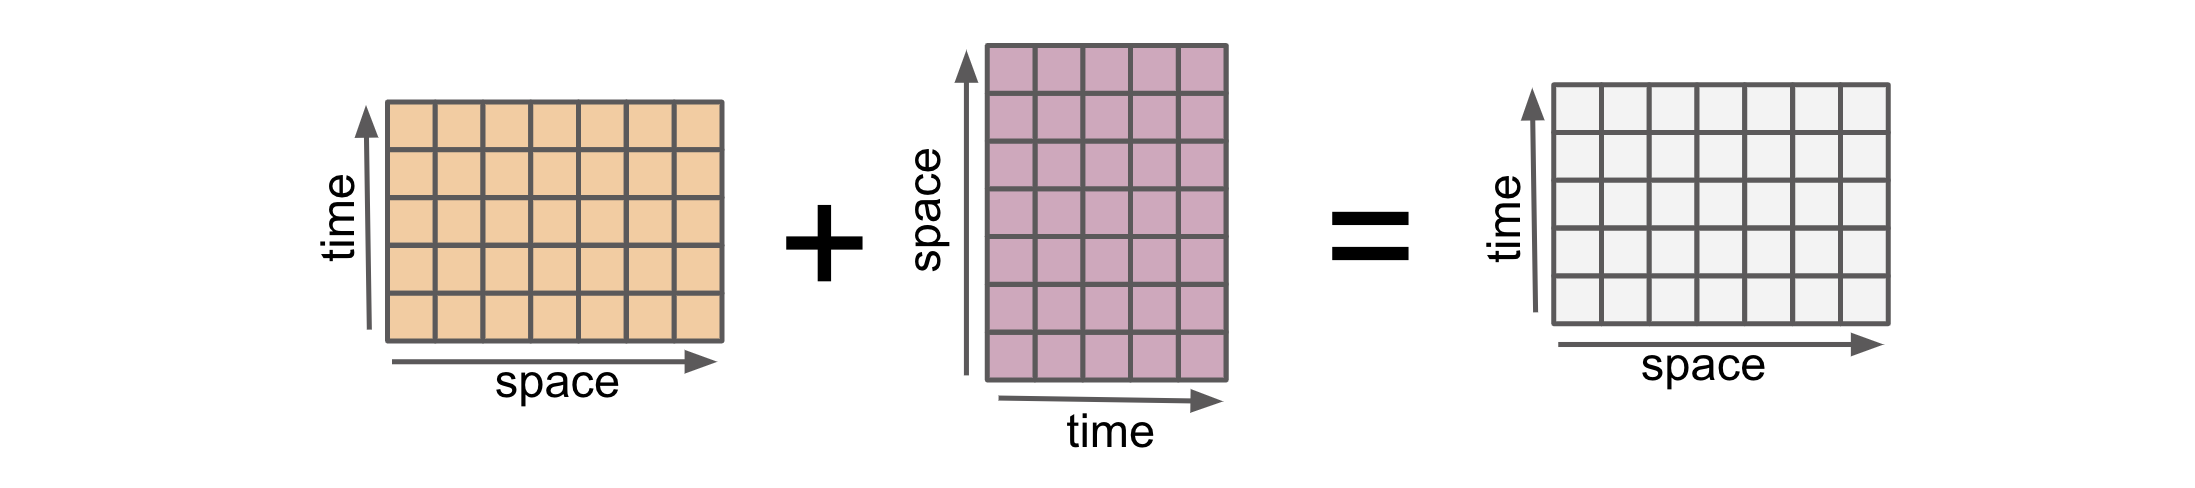

In [35]:
arr1 = xr.DataArray(
    np.arange(12).reshape(3, 4),
    dims=("space", "time"),
    coords={"space": ["a", "b", "c"], "time": [0, 1, 2, 3]},
)
arr1

<xarray.DataArray (space: 3, time: 4)> Size: 96B
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Coordinates:
  * space    (space) <U1 12B 'a' 'b' 'c'
  * time     (time) int64 32B 0 1 2 3

In [37]:
arr2 = xr.DataArray(
    np.arange(14).reshape(2, 7),
    dims=("space", "time"),
    coords={"space": ["b", "d"], "time": [-2, -1, 0, 1, 2, 3, 4]},
)
arr2

<xarray.DataArray (space: 2, time: 7)> Size: 112B
array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13]])
Coordinates:
  * space    (space) <U1 8B 'b' 'd'
  * time     (time) int64 56B -2 -1 0 1 2 3 4

In [ ]:
# arr1 and arr2 have the same dimensions (space, time) but have values at different 
# locations in the (space, time) plane with some locations in common.

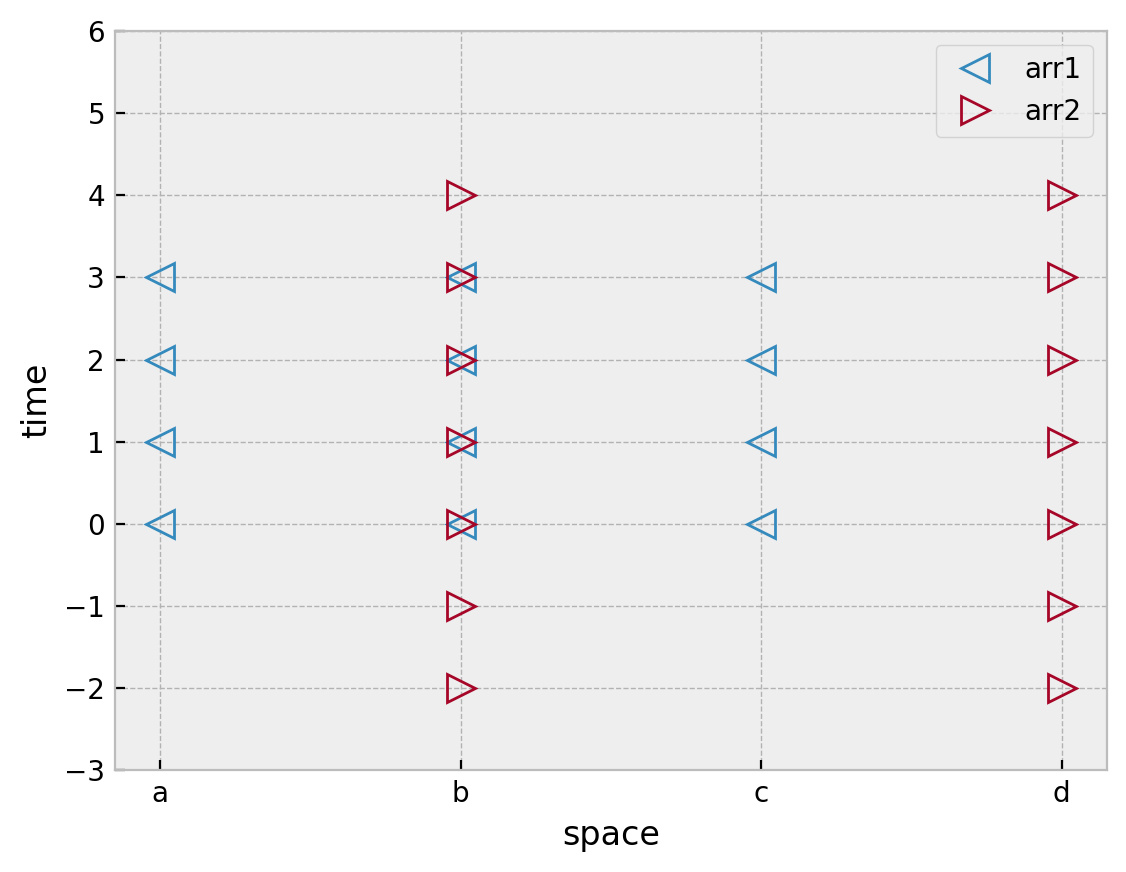

In [38]:
def visualize_mesh(array, *args, ax=None, **kwargs):
    """Visualizes array's mesh ((points at which values are present)."""

    # Use broadcast to generate 2D x_, y_ arrays from the 1D x,y arrays
    space_, time_ = xr.broadcast(array.space, array.time)
    if ax is None:
        ax = plt.gca()
    kwargs.setdefault("fillstyle", "none")
    kwargs.setdefault("markersize", 10)
    ax.plot(space_.data.ravel(), time_.data.ravel(), *args, **kwargs)
    ax.set_xlabel("space")
    ax.set_ylabel("time")


visualize_mesh(arr1, "<")
visualize_mesh(arr2, ">")
plt.ylim([-3, 6])
plt.legend(["arr1", "arr2"])

In [39]:
# We see that both arrays only have values in common at x="b" and y=[0, 1, 2, 3]. 
# Before applying an arithmetic operation we must first modify each DataArray so that 
# they have values at the same points. This is “alignment”.

with xr.set_options(arithmetic_join="outer"):
    result = arr1 - arr2
result

<xarray.DataArray (space: 4, time: 7)> Size: 224B
array([[nan, nan, nan, nan, nan, nan, nan],
       [nan, nan,  2.,  2.,  2.,  2., nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan]])
Coordinates:
  * space    (space) <U1 16B 'a' 'b' 'c' 'd'
  * time     (time) int64 56B -2 -1 0 1 2 3 4

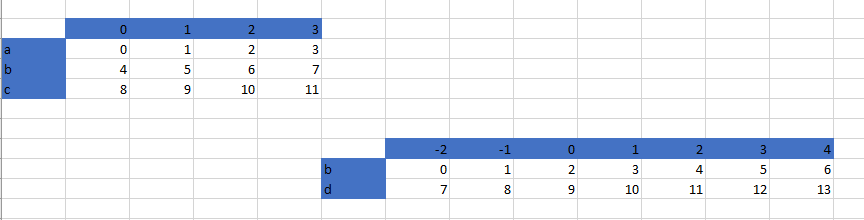

- join="inner" or reindex to the “intersection set” of coordinate labels
- join="outer" or reindex to the “union set” of coordinate labels
- join="left" or reindex to the coordinate labels of the leftmost object
- join="right" or reindex to the coordinate labels of the rightmost object
- join="exact" checks for exact equality of coordinate labels before the operation

In [47]:
a1_aligned, a2_aligned = xr.align(arr1, arr2, join="outer")
display(a1_aligned)
display(a2_aligned)

<xarray.DataArray (space: 4, time: 7)> Size: 224B
array([[nan, nan,  0.,  1.,  2.,  3., nan],
       [nan, nan,  4.,  5.,  6.,  7., nan],
       [nan, nan,  8.,  9., 10., 11., nan],
       [nan, nan, nan, nan, nan, nan, nan]])
Coordinates:
  * space    (space) <U1 16B 'a' 'b' 'c' 'd'
  * time     (time) int64 56B -2 -1 0 1 2 3 4

<xarray.DataArray (space: 4, time: 7)> Size: 224B
array([[nan, nan, nan, nan, nan, nan, nan],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.],
       [nan, nan, nan, nan, nan, nan, nan],
       [ 7.,  8.,  9., 10., 11., 12., 13.]])
Coordinates:
  * space    (space) <U1 16B 'a' 'b' 'c' 'd'
  * time     (time) int64 56B -2 -1 0 1 2 3 4